In [39]:
!pip install scipy matplotlib scikit-learn pandas seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
from scipy.stats import zscore
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [37]:
uber_df = pd.read_csv('ncr_ride_bookings.csv')
uber_df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

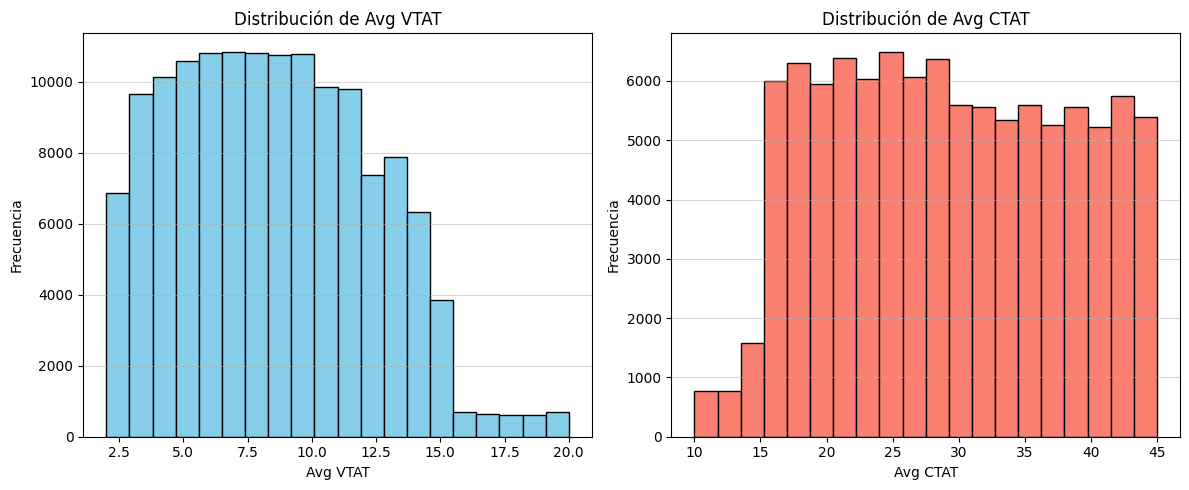

In [38]:

# 2️⃣ Seleccionar columnas
vtat = uber_df['Avg VTAT']
ctat = uber_df['Avg CTAT']

# 3️⃣ Graficar histogramas (uno por cada columna)
plt.figure(figsize=(12,5))

# --- Histograma de Avg VTAT ---
plt.subplot(1, 2, 1)
plt.hist(vtat, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Avg VTAT')
plt.xlabel('Avg VTAT')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.5)

# --- Histograma de Avg CTAT ---
plt.subplot(1, 2, 2)
plt.hist(ctat, bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de Avg CTAT')
plt.xlabel('Avg CTAT')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
uber_df_cancelled = pd.read_csv('ncr_ride_bookings.csv')
uber_df_cancelled.columns

In [ ]:
uber_df_cancelled = uber_df_cancelled[uber_df_cancelled['Booking Status'] != 'Completed']
uber_df_cancelled

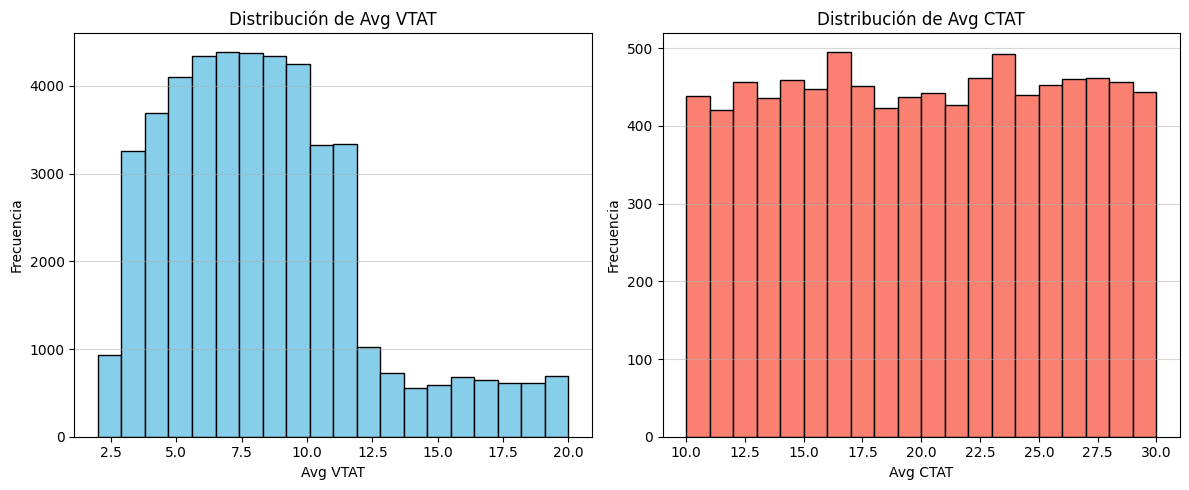

In [36]:
# 2️⃣ Seleccionar columnas
vtat = uber_df_cancelled['Avg VTAT']
ctat = uber_df_cancelled['Avg CTAT']

# 3️⃣ Graficar histogramas (uno por cada columna)
plt.figure(figsize=(12,5))

# --- Histograma de Avg VTAT ---
plt.subplot(1, 2, 1)
plt.hist(vtat, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Avg VTAT')
plt.xlabel('Avg VTAT')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.5)

# --- Histograma de Avg CTAT ---
plt.subplot(1, 2, 2)
plt.hist(ctat, bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de Avg CTAT')
plt.xlabel('Avg CTAT')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()

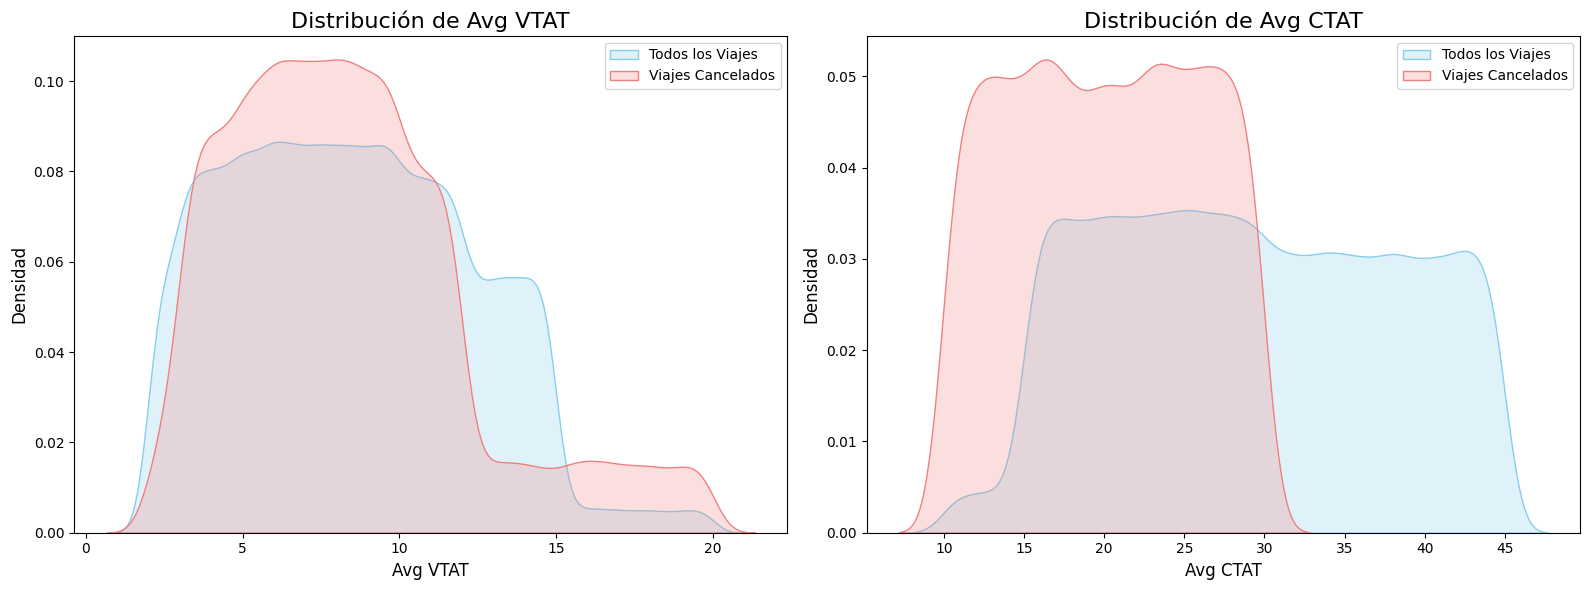

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Cargar los datos una sola vez
uber_df = pd.read_csv('ncr_ride_bookings.csv')

# 2️⃣ Filtrar para obtener solo los viajes cancelados
uber_df_cancelled = uber_df[uber_df['Booking Status'] != 'Completed'].copy()

# 3️⃣ Crear una figura con dos subplots (uno para VTAT y otro para CTAT)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Gráfico de Densidad para Avg VTAT ---
sns.kdeplot(uber_df['Avg VTAT'], ax=axes[0], color='skyblue', label='Todos los Viajes', fill=True)
sns.kdeplot(uber_df_cancelled['Avg VTAT'], ax=axes[0], color='lightcoral', label='Viajes Cancelados', fill=True)
axes[0].set_title('Distribución de Avg VTAT', fontsize=16)
axes[0].set_xlabel('Avg VTAT', fontsize=12)
axes[0].set_ylabel('Densidad', fontsize=12)
axes[0].legend()

# --- Gráfico de Densidad para Avg CTAT ---
sns.kdeplot(uber_df['Avg CTAT'], ax=axes[1], color='skyblue', label='Todos los Viajes', fill=True)
sns.kdeplot(uber_df_cancelled['Avg CTAT'], ax=axes[1], color='lightcoral', label='Viajes Cancelados', fill=True)
axes[1].set_title('Distribución de Avg CTAT', fontsize=16)
axes[1].set_xlabel('Avg CTAT', fontsize=12)
axes[1].set_ylabel('Densidad', fontsize=12)
axes[1].legend()

plt.tight_layout()
plt.savefig('distributions_plot.png')

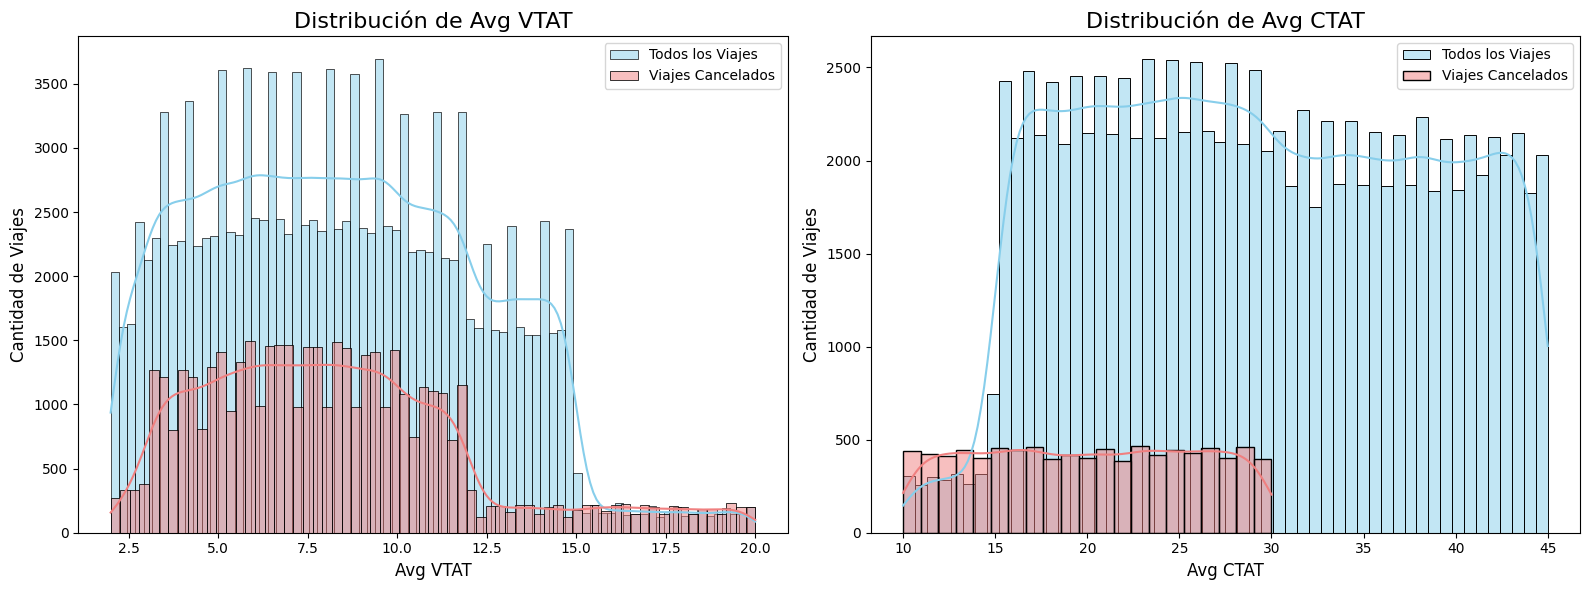

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Cargar los datos una sola vez
uber_df = pd.read_csv('ncr_ride_bookings.csv')

# 2️⃣ Filtrar para obtener solo los viajes cancelados
uber_df_cancelled = uber_df[uber_df['Booking Status'] != 'Completed'].copy()

# 3️⃣ Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Histograma para Avg VTAT ---
sns.histplot(data=uber_df, x='Avg VTAT', ax=axes[0], color='skyblue', label='Todos los Viajes', kde=True)
sns.histplot(data=uber_df_cancelled, x='Avg VTAT', ax=axes[0], color='lightcoral', label='Viajes Cancelados', kde=True)
axes[0].set_title('Distribución de Avg VTAT', fontsize=16)
axes[0].set_xlabel('Avg VTAT', fontsize=12)
axes[0].set_ylabel('Cantidad de Viajes', fontsize=12)
axes[0].legend()

# --- Histograma para Avg CTAT ---
sns.histplot(data=uber_df, x='Avg CTAT', ax=axes[1], color='skyblue', label='Todos los Viajes', kde=True)
sns.histplot(data=uber_df_cancelled, x='Avg CTAT', ax=axes[1], color='lightcoral', label='Viajes Cancelados', kde=True)
axes[1].set_title('Distribución de Avg CTAT', fontsize=16)
axes[1].set_xlabel('Avg CTAT', fontsize=12)
axes[1].set_ylabel('Cantidad de Viajes', fontsize=12)
axes[1].legend()

plt.tight_layout()
plt.savefig('distributions_histogram.png')

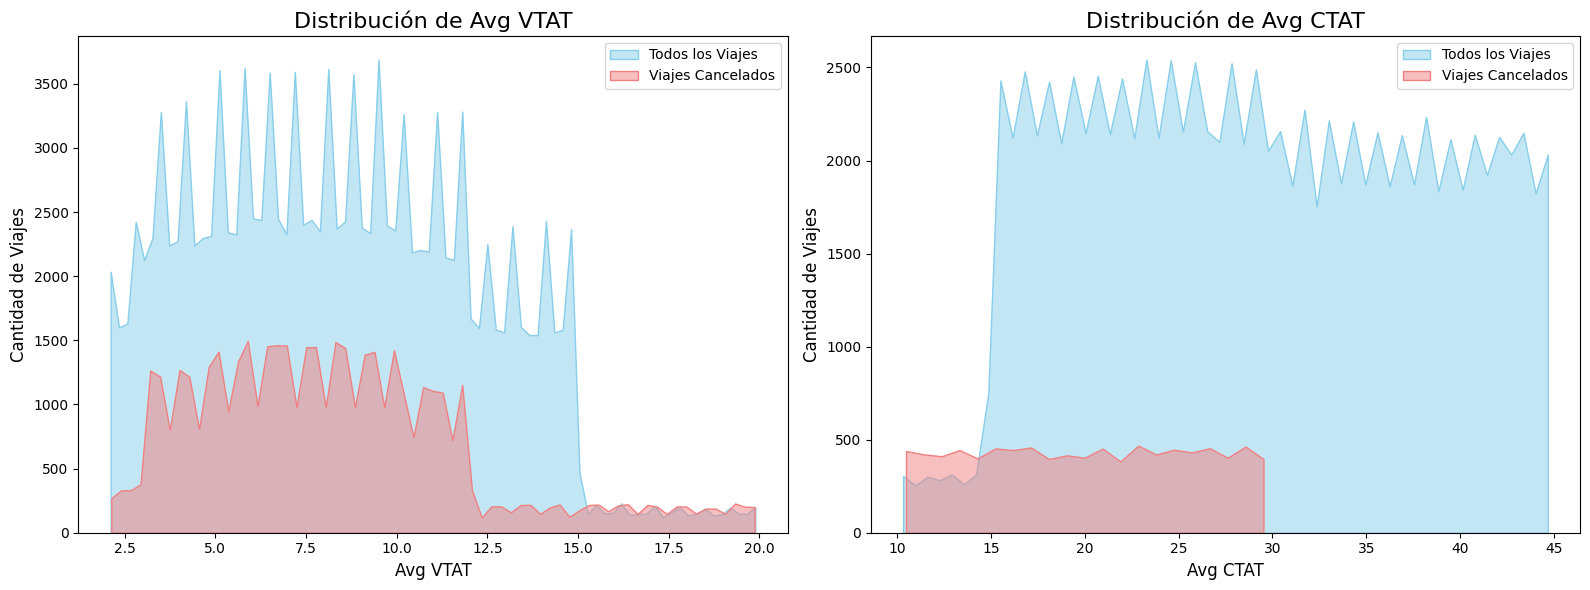

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Cargar los datos
# Asegúrate de que el archivo 'ncr_ride_bookings.csv' esté disponible.
try:
    uber_df = pd.read_csv('ncr_ride_bookings.csv')
except FileNotFoundError:
    print("Error: No se encontró el archivo 'ncr_ride_bookings.csv'. Por favor, sube el archivo para generar el gráfico.")
    exit()

# 2️⃣ Filtrar para obtener solo los viajes cancelados
uber_df_cancelled = uber_df[uber_df['Booking Status'] != 'Completed'].copy()

# 3️⃣ Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Gráfico de Polígonos para Avg VTAT ---
# Usamos element='poly' para crear una línea continua basada en el conteo
sns.histplot(data=uber_df, x='Avg VTAT', ax=axes[0], color='skyblue', label='Todos los Viajes', element='poly', fill=True, alpha=0.5)
sns.histplot(data=uber_df_cancelled, x='Avg VTAT', ax=axes[0], color='lightcoral', label='Viajes Cancelados', element='poly', fill=True, alpha=0.5)
axes[0].set_title('Distribución de Avg VTAT', fontsize=16)
axes[0].set_xlabel('Avg VTAT', fontsize=12)
axes[0].set_ylabel('Cantidad de Viajes', fontsize=12) # ¡Ahora esta etiqueta es correcta!
axes[0].legend()

# --- Gráfico de Polígonos para Avg CTAT ---
sns.histplot(data=uber_df, x='Avg CTAT', ax=axes[1], color='skyblue', label='Todos los Viajes', element='poly', fill=True, alpha=0.5)
sns.histplot(data=uber_df_cancelled, x='Avg CTAT', ax=axes[1], color='lightcoral', label='Viajes Cancelados', element='poly', fill=True, alpha=0.5)
axes[1].set_title('Distribución de Avg CTAT', fontsize=16)
axes[1].set_xlabel('Avg CTAT', fontsize=12)
axes[1].set_ylabel('Cantidad de Viajes', fontsize=12) # ¡Ahora esta etiqueta es correcta!
axes[1].legend()

plt.tight_layout()
plt.savefig('distributions_polygon.png')
plt.show()